In [3]:
import os
from os.path import join
import sys
import numpy as np 
import pandas as pd
import seaborn as sns

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# load the combined cursorTracking data for all subjs
df = pd.read_table('../../data/groupData/allSubjsRaw.tsv', sep='\t')

In [12]:
# select the relevant rows from the full dataframe
# df2 = df.loc[(df['stim'].str.contains("_images707/bw_hmn/")) | 
#              (df['stim'].str.contains("_images707/hmn/"))]
df2 = df.loc[df['stim'].str.contains("_images707/hmn/")]

## Compare all AOIs

In [13]:
# loop over all unique subjects
subjMeans = []
for s in np.unique(df2.subjID):
    # grab this subjects data
    subj_df = df2.loc[df2.subjID == s]
    
    # loop through unique trials
    trialAOImeans = []
    for i,t in enumerate(np.unique(subj_df.trialNum)):
        # grab this trial's data
        trial_df = subj_df[subj_df.trialNum == t]
        
        # calculate mean time/frame
        meanFrameInterval = trial_df.ts.diff().mean()
        
        # get number of frames for each AOI
        AOI_counts = trial_df.AOI.value_counts()
        
        # multiple frame counts by mean frame interval to get time spent in the AOI
        AOI_time = AOI_counts * meanFrameInterval
        
        # change the 'name' field of the AOI_time series to reflect the current trialNum
        AOI_time.name = t
    
        # add to table of all trials for this subject
        trialAOImeans.append(AOI_time)
    
    # put all of the trials together into one dataFrame
    allTrials = pd.concat(trialAOImeans, axis=1).T
    
    # calculate the mean across trials for each AOI for this subject
    subj_mean = allTrials.mean()
    
    # update the 'name' field to reflect current subject
    subj_mean.name = s
    
    # add this output to a list of all subjects
    subjMeans.append(subj_mean)
    
# put all subjects together into a single dataframe
allSubjs = pd.concat(subjMeans, axis=1).T

In [14]:
allSubjs.head()

,leftEye,mouth,none,nose,rightEye
741,197.004944,735.228757,3539.813835,472.570550,309.585062
1164,409.974692,693.316771,3177.402269,522.126853,182.574427
20649,336.171466,706.797475,2232.980557,1224.823844,482.759599
27235,651.124500,930.139219,1657.710479,961.281287,937.530206
27537,389.545153,478.512368,3579.287587,397.312375,143.330350


In [15]:
sns.set(style='whitegrid')

In [16]:
# drop the 'none' column
allSubjs = allSubjs.drop('none', 1)

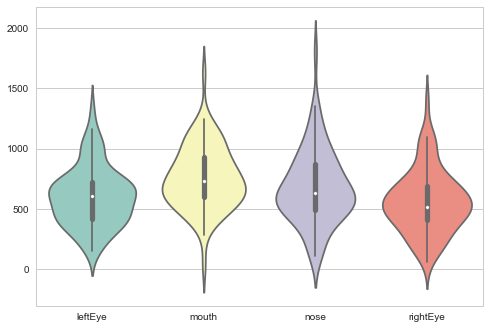

In [17]:
# plot distributions of each AOI
sns.violinplot(data=allSubjs, palette='Set3')